# 3.2 탐색적 데이터 분석 
- 데이콘 경진대회 1등 솔루션 ch03

In [1]:
import pandas as pd

In [9]:
# 데이터 로드
train = pd.read_csv("ch03/train.csv")
test = pd.read_csv("ch03/test.csv")
bts=pd.read_csv("ch03/bus_bts.csv")
jeju_life = pd.read_csv("ch03/jeju_financial_life_data.csv")
weather = pd.read_csv("ch03/weather.csv", encoding='cp949')
rain = pd.read_csv("ch03/rain.csv", encoding='utf-8')

## 3.2.1 데이터 설명 
- train, test 데이터와 나머지 데이터들간의 공통적인 특징을 생각해보기 

In [10]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [12]:
# bus_bts = 버스 카드별 승하차 정보 

bts.head(3)

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1


In [13]:
# 변수별 non-null의 수를 파악 
bts.info(null_counts=True)

<ipython-input-13-bc1115c9611d>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  bts.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_card_id         2409414 non-null  float64
 1   bus_route_id         2409414 non-null  int64  
 2   vhc_id               2409414 non-null  int64  
 3   geton_date           2409414 non-null  object 
 4   geton_time           2409414 non-null  object 
 5   geton_station_code   2409414 non-null  int64  
 6   geton_station_name   2409365 non-null  object 
 7   getoff_date          1513678 non-null  object 
 8   getoff_time          1513678 non-null  object 
 9   getoff_station_code  1513678 non-null  float64
 10  getoff_station_name  1513639 non-null  object 
 11  user_category        2409414 non-null  int64  
 12  user_count           2409414 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


In [15]:
# jeju_financial_life = 제주도의 우편번호를 단위로 구분한 제주도 지역민의 금융 생활에 대한 통계

jeju_life.head(3)

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.0,0.0,...,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.0
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.0,0.0,...,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.0
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.0,0.0,...,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.0


In [17]:
jeju_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_cd               10422 non-null  int64  
 1   year_month           10422 non-null  int64  
 2   x_axis               10422 non-null  float64
 3   y_axis               10422 non-null  float64
 4   sex                  10422 non-null  int64  
 5   age                  10422 non-null  int64  
 6   job_majorc           10422 non-null  float64
 7   job_smallc           10422 non-null  float64
 8   job_public           10422 non-null  float64
 9   job_profession       10422 non-null  float64
 10  job_self             10422 non-null  float64
 11  job_none             10422 non-null  float64
 12  job_other            10422 non-null  float64
 13  avg_income           10422 non-null  int64  
 14  med_income           10422 non-null  int64  
 15  avg_spend            10422 non-null 

In [18]:
# weather = 9월 1일부터 30일까지 제주도 전체 오전 10시의 기상 정보 데이터

weather.head(3)

,날짜,현재일기,현재기온,체감온도,일강수
0,2019-09-01,흐림,26.2,75.0,0
1,2019-09-02,비 끝남,22.5,72.0,25.7
2,2019-09-03,흐림,25.4,77.0,12.1


In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      46 non-null     object 
 1   현재일기    46 non-null     object 
 2   현재기온    46 non-null     float64
 3   체감온도    46 non-null     float64
 4   일강수     46 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.9+ KB


In [20]:
# rain = 9월 1일 부터 30일까지 고산, 서귀포, 제주, 성상 지점별 오전 6~11시 평균 기상 정보 데이터
rain.head()

,지점,일시,기온(°C),강수량(mm)
0,gosan,2019-09-01,23.916667,0.00
1,gosan,2019-09-02,23.700000,12.10
2,gosan,2019-09-03,23.550000,1.90
3,gosan,2019-09-04,23.533333,12.84
4,gosan,2019-09-05,26.033333,0.00


In [21]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       184 non-null    object 
 1   일시       184 non-null    object 
 2   기온(°C)   184 non-null    float64
 3   강수량(mm)  66 non-null     float64
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


## 3.2.2 데이터 시각화를 통한 탐색적 데이터 분석 
- 데이터 시각화와 통계적 기법을 사용해 주어진 데이터를 탐색 
    - 데이터의 분포와 패턴을 확인가능, 문제점을 발견해 새로운 가설 설정 가능

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 내부에 결과를 출력하도록 설정 
%matplotlib inline

# 시각화 한글 폰트 설정 
plt.rc('font', family='AppleGothic')

# 마이너스 기호 출력 
plt.rc('axes', unicode_minus = False)

# 부석에 문제가 없는 경고 메시지는 숨김 
import warnings
warnings.filterwarnings('ignore')

* 원 데이터 훼손을 막기 위해 데이터 시각화에는 학습 데이터의 복사본 사용 

In [23]:
# 복사본 생성 
traindata = train.copy()

* 타깃변수(퇴근시간 승차인원)의 분포 확인하기 
    - 값이 특정 구간에 치우쳐 있는지와 분포 범위를 확인하기 

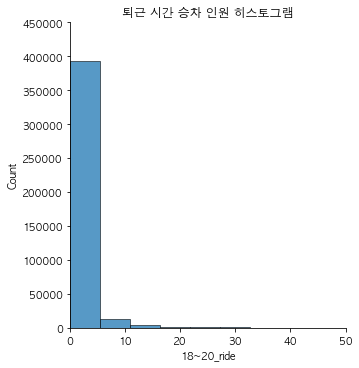

In [24]:
# 단변수(하나의 변수) 데이터의 분포를 확인할 때 distplot()함수를 이용 
# kde =False 는 커널 밀도 그래프를 표시하지 않는다.

sns.displot(traindata['18~20_ride'], kde=False, bins=50)
plt.axis([0,50,0,450000])           # [x축 최솟값, x축 최댓값, y축 최솟값, y축 최댓값]
plt.title('퇴근 시간 승차 인원 히스토그램')
plt.show()

히스토그램 분석 결과 
- 왼쪽으로 치우쳐져 있으며, 승차인원 0~5명인 구간에 대부분 값이 존재
- 0~5에 얼마나 분포 되어 있는지확인 

In [27]:
# 타깃변수(퇴근시간 승차인원)분포 확인 
traindata.groupby('18~20_ride').size().head(6)

18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
5.0      5911
dtype: int64

* 요일에 따른 퇴근시간 평균 탑승객 수

In [29]:
# 날짜 형으로 변환 
traindata['date'] = pd.to_datetime(traindata['date'])

# 요일을 문자형으로 추출해 변수 생성 
# 월요일 - Mon 형태로 변형 
traindata['weekday']=traindata['date'].dt.strftime('%a')

traindata.head(3)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sun
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Sun
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Sun


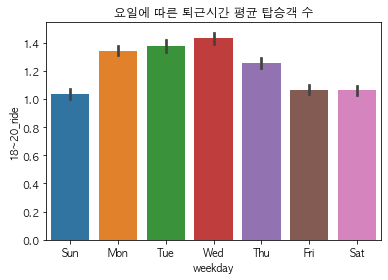

In [30]:
# 요일별 퇴근시간 평균 탑승객 수 시각화 

sns.barplot(x='weekday', y="18~20_ride", data=traindata)
plt.title("요일에 따른 퇴근시간 평균 탑승객 수")
plt.show()

결과 : 월요일 부터 수요일까지 퇴근시간 승차인원이 점차 증가하다가 수요일 이후로는 점점 감소 

* 버스 종류에 따른 탑승객 수
    - 시내버스와 시외버스 종류에 따른 퇴근시간 승차 인원수 변화 확인 

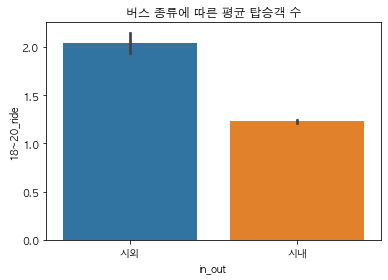

In [32]:
sns.barplot(x="in_out", y="18~20_ride", data=traindata)
plt.title("버스 종류에 따른 평균 탑승객 수")
plt.show()

결과 : 퇴근 시간에 버스를 이용하는 사람 수에 차이가 있음 

* 일별 출퇴근 시간 탑승객 수 
    - 출퇴근 시간 (8~9, 9~10) 데이터를 합쳐야함 

In [34]:
traindata['8~10_ride']=traindata['8~9_ride']+traindata['9~10_ride']
eda_data = traindata.groupby('date')[['18~20_ride','8~10_ride']].agg('sum').reset_index()

eda_data.head()

,date,18~20_ride,8~10_ride
0,2019-09-01,11537.0,11957.0
1,2019-09-02,20561.0,21844.0
2,2019-09-03,19743.0,25756.0
3,2019-09-04,20133.0,21472.0
4,2019-09-05,20392.0,26331.0


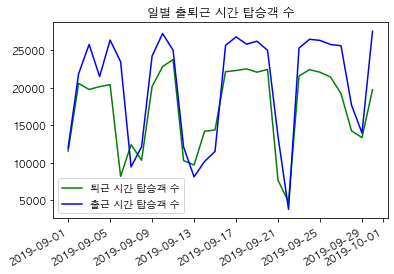

In [37]:
# 일별 출 퇴근 시간 탑승객 수 시각화 

plt.plot('date', '18~20_ride', 'g-', label='퇴근 시간 탑승객 수', data=eda_data)
plt.plot('date', '8~10_ride', 'b-', label='출근 시간 탑승객 수', data=eda_data)

# X축 라벨이 서로 겹치지 않도록 설정 
plt.gcf().autofmt_xdate()
# 그래프 상에서 최적의 위치에 범례 표시 
plt.legend(loc=0)
plt.title('일별 출퇴근 시간 탑승객 수')
plt.show()


분석 결과 :출,퇴근 시간 탑승객 현황은 비슷한 패턴을 보여준다. 출근 시간 탑승객 수가 퇴근시간 탑승객보다 더 많다. 